In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
#Import the requests library and api key
import requests
from config import weather_api_key
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb4fe2479b4a7b62ce10baa4cab0d875


In [9]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | taoudenni
Processing Record 3 of Set 1 | deputatskiy
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | nome
Processing Record 8 of Set 1 | paita
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | chuguyevka
Processing Record 12 of Set 1 | santa fe
Processing Record 13 of Set 1 | bathsheba
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | tarakan
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | ugoofaaru
Processing Record 22 of Set 1 | atambua
Processing Record 23 of Set 1 | iqaluit
Processing Reco

Processing Record 39 of Set 4 | saleaula
City not found. Skipping...
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | along
Processing Record 42 of Set 4 | anori
Processing Record 43 of Set 4 | cabedelo
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | sananduva
Processing Record 46 of Set 4 | ishigaki
Processing Record 47 of Set 4 | sinnamary
Processing Record 48 of Set 4 | gat
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | pisco
Processing Record 1 of Set 5 | hambantota
Processing Record 2 of Set 5 | ekibastuz
Processing Record 3 of Set 5 | rudnogorsk
Processing Record 4 of Set 5 | cayenne
Processing Record 5 of Set 5 | smithers
Processing Record 6 of Set 5 | grindavik
Processing Record 7 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 5 | nalut
Processing Record 9 of Set 5 | mount isa
Processing Record 10 of Set 5 | benghazi
Processing Record 11 of Set 5 | ruwi
Processing Record 12 of 

City not found. Skipping...
Processing Record 28 of Set 8 | alugan
Processing Record 29 of Set 8 | tahta
Processing Record 30 of Set 8 | talcahuano
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | vitry-le-francois
Processing Record 33 of Set 8 | chagda
City not found. Skipping...
Processing Record 34 of Set 8 | phan rang
City not found. Skipping...
Processing Record 35 of Set 8 | havoysund
Processing Record 36 of Set 8 | teknaf
Processing Record 37 of Set 8 | taltal
Processing Record 38 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 39 of Set 8 | davila
Processing Record 40 of Set 8 | erzin
Processing Record 41 of Set 8 | rock sound
Processing Record 42 of Set 8 | axim
Processing Record 43 of Set 8 | nauta
Processing Record 44 of Set 8 | gushikawa
Processing Record 45 of Set 8 | muros
Processing Record 46 of Set 8 | barcelos
Processing Record 47 of Set 8 | bambanglipuro
Processing Record 48 of Set 8 | fairbanks
Processing Record 49 of Set 8 

Processing Record 20 of Set 12 | rosetta
Processing Record 21 of Set 12 | mount pleasant
Processing Record 22 of Set 12 | tungor
Processing Record 23 of Set 12 | tarko-sale
Processing Record 24 of Set 12 | san ramon
Processing Record 25 of Set 12 | marsh harbour
Processing Record 26 of Set 12 | mgandu
Processing Record 27 of Set 12 | vostok
Processing Record 28 of Set 12 | peterhead
Processing Record 29 of Set 12 | aurillac
Processing Record 30 of Set 12 | boende
Processing Record 31 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 32 of Set 12 | oussouye
Processing Record 33 of Set 12 | bossangoa
Processing Record 34 of Set 12 | lebyazhye
Processing Record 35 of Set 12 | katsiveli
City not found. Skipping...
Processing Record 36 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 37 of Set 12 | callaguip
Processing Record 38 of Set 12 | balagansk
Processing Record 39 of Set 12 | shimanovsk
Processing Record 40 of Set 12 | belmonte
Processing Record 

In [10]:
len(city_data)

581

In [11]:
#Convert the array of dictionaries to a Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,5.81,74,0,4.97,GL,2020-10-29 16:01:48
1,Taoudenni,22.68,-3.98,96.17,10,0,12.37,ML,2020-10-29 16:01:48
2,Deputatskiy,69.30,139.90,1.22,93,97,1.25,RU,2020-10-29 16:01:49
3,Torbay,47.67,-52.73,42.01,69,75,11.41,CA,2020-10-29 16:01:49
4,Mahebourg,-20.41,57.70,71.01,71,42,4.00,MU,2020-10-29 16:01:49
5,Rikitea,-23.12,-134.97,74.43,71,100,8.70,PF,2020-10-29 16:01:49
6,Nome,64.50,-165.41,24.80,85,90,3.36,US,2020-10-29 16:01:49
7,Paita,-5.09,-81.11,75.20,64,0,23.04,PE,2020-10-29 16:01:49
8,Jamestown,42.10,-79.24,44.01,87,90,3.36,US,2020-10-29 16:01:50
9,Klaksvik,62.23,-6.59,48.20,93,24,9.17,FO,2020-10-29 16:01:50


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2020-10-29 16:01:48,77.48,-69.36,5.81,74,0,4.97
1,Taoudenni,ML,2020-10-29 16:01:48,22.68,-3.98,96.17,10,0,12.37
2,Deputatskiy,RU,2020-10-29 16:01:49,69.30,139.90,1.22,93,97,1.25
3,Torbay,CA,2020-10-29 16:01:49,47.67,-52.73,42.01,69,75,11.41
4,Mahebourg,MU,2020-10-29 16:01:49,-20.41,57.70,71.01,71,42,4.00
5,Rikitea,PF,2020-10-29 16:01:49,-23.12,-134.97,74.43,71,100,8.70
6,Nome,US,2020-10-29 16:01:49,64.50,-165.41,24.80,85,90,3.36
7,Paita,PE,2020-10-29 16:01:49,-5.09,-81.11,75.20,64,0,23.04
8,Jamestown,US,2020-10-29 16:01:50,42.10,-79.24,44.01,87,90,3.36
9,Klaksvik,FO,2020-10-29 16:01:50,62.23,-6.59,48.20,93,24,9.17


In [19]:
#Create the output file CSV
output_data_file = "weather_data/cities.csv"
#Expoert the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
import time

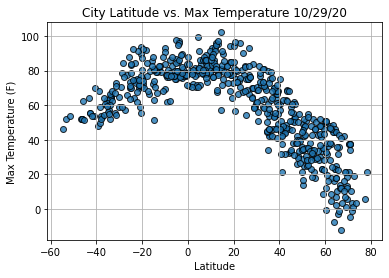

In [23]:
#build the scatter plot for latitude vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()